In [1]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Churn_Modelling (1).csv") 
df1 = df

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


Figure(1000x400)


<Axes: xlabel='Age'>

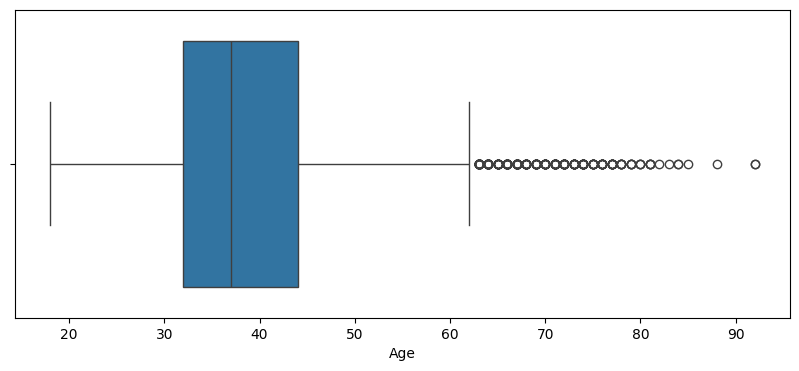

In [4]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Age", data = df1) 

Figure(1000x400)


<Axes: xlabel='EstimatedSalary'>

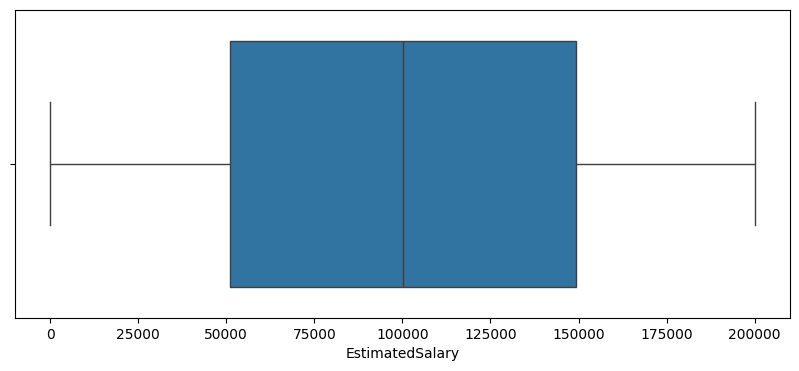

In [7]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "EstimatedSalary", data = df1) 

In [8]:
# finding IQR
percentile25 = df1['Age'].quantile(0.25)
percentile75 = df1['Age'].quantile(0.75)
iqr = percentile75 - percentile25

In [9]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [10]:
# finding outliers using iqr
df1[df1['Age'] > upper_limit]
df1[df1['Age'] < lower_limit]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [11]:
# trimming outliers
new_df = df1[df1['Age'] < upper_limit]
new_df.shape

(9590, 14)

C:\Users\HP\AppData\Local\Temp\ipykernel_9276\1794145075.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])
C:\Users\HP\AppData\Local\Temp\ipykernel_9276\1794145075.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Age'])


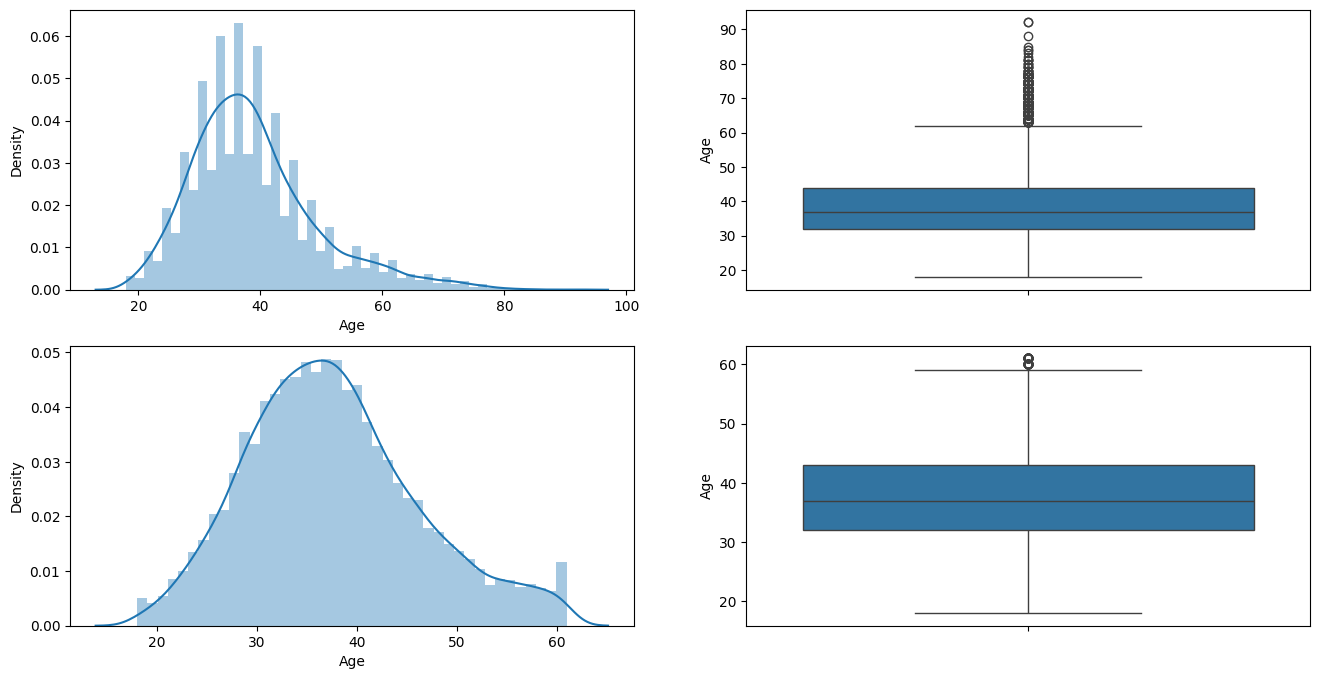

In [12]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Age'])
plt.subplot(2,2,2)
sns.boxplot(df1['Age'])
plt.subplot(2,2,3)
sns.distplot(new_df['Age'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Age'])
plt.show()

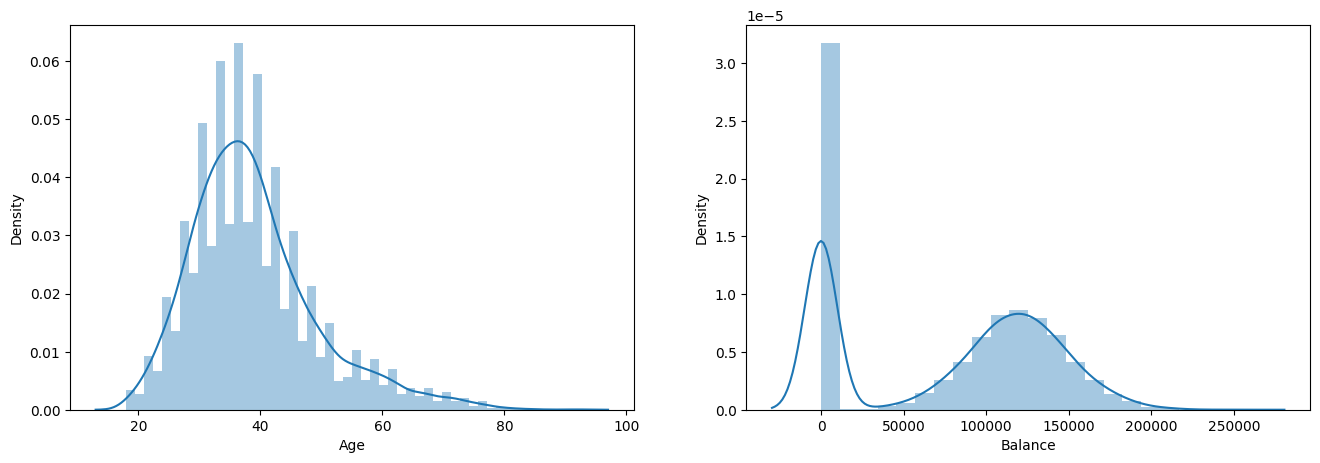

In [15]:
# plot distributions for features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['Age'])
plt.subplot(1,2,2)
sns.distplot(df1['Balance'])
plt.show()

In [19]:
# finding boundary values for bmi using z-score
print("Highest allowed",df1['Balance'].mean() + 3*df1['Balance'].std())
print("Lowest allowed",df1['Balance'].mean() - 3*df1['Balance'].std())

Highest allowed 263671.5353082673
Lowest allowed -110689.30955741745


In [43]:
# finding outliers for bmi
new_df1 = df1[(df1['Balance'] < 250000.00) & (df1['Balance'] > 0)]
new_df1

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [44]:
# Trimming of outliers for bmi
df1[(df1['Balance'] > 250000.00) | (df1['Balance'] < 0)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,2093,15757408,Lo,655,Spain,Male,38.0,3,250898.09,3,0.0,1.0,81054.0,1


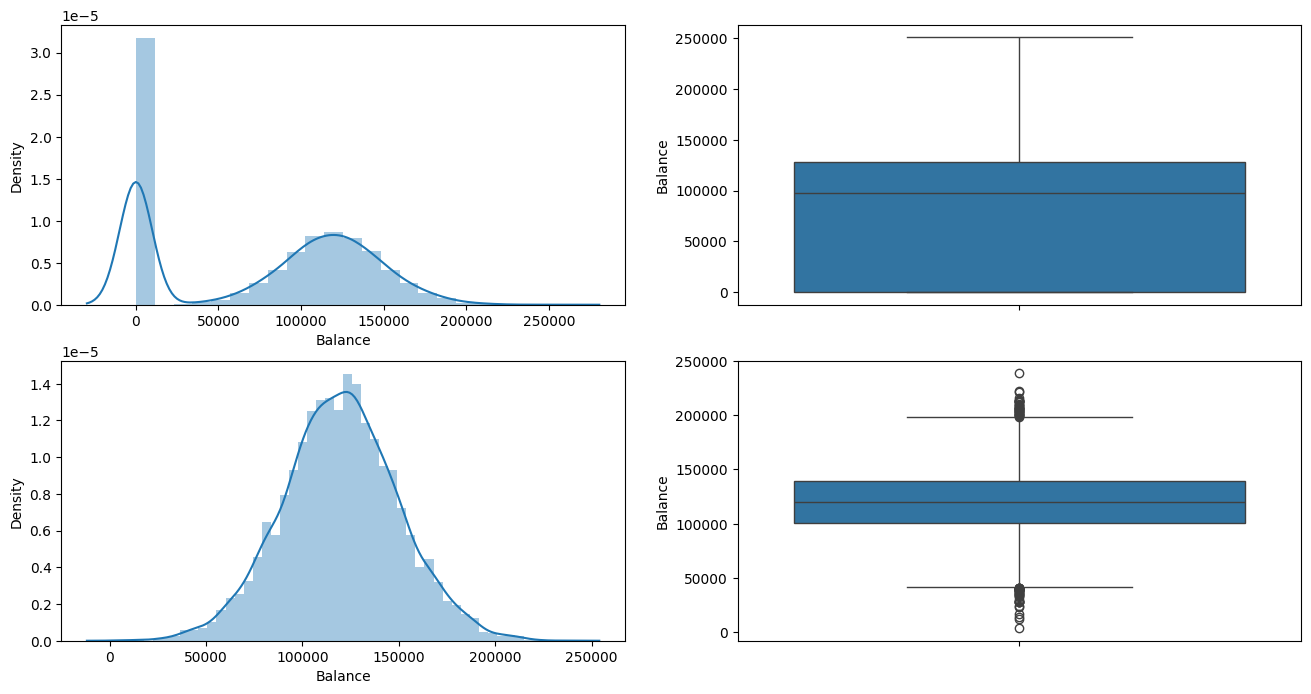

In [45]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Balance'])
plt.subplot(2,2,2)
sns.boxplot(df1['Balance'])
plt.subplot(2,2,3)
sns.distplot(new_df1['Balance'])
plt.subplot(2,2,4)
sns.boxplot(new_df1['Balance'])
plt.show()